# Assignments 1 : 数据集上的探索性数据分析和数据预处理

## 相关信息

本代码是北京理工大学计算机学院 2021 数据挖掘课程的课程作业。
+ 项目主页为：[DataMining-Course-of-BIT](https://github.com/tenkeyseven/DataMining-Course-of-BIT)
+ 详细说明为：[Assignments 1](https://github.com/tenkeyseven/DataMining-Course-of-BIT/tree/main/Assignments-1)
+ 本部分实验采用的数据集为：[Oakland Crime Statistics](https://www.kaggle.com/cityofoakland/oakland-crime-statistics-2011-to-2016)

## 作业要求：
### 一、数据可视化和摘要
+ 数据摘要
  + 标称属性，给出每个可能取值的频数
  + 数值属性，给出5数概括及缺失值的个数
+ 数据可视化
  + 使用直方图、盒图等检查数据分布及离群点

### 二、缺失数据的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:
+ 将缺失部分剔除
+ 用最高频率值来填补缺失值
+ 通过属性的相关关系来填补缺失值
+ 通过数据对象之间的相似性来填补缺失值



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path_130 = '../Datasets/oakland-crime/records-for-2016.csv'
df_130 = pd.read_csv(file_path_130)

In [3]:
# 数据预览，可见数据总数、非空数据数量和数据类型。
df_130.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110828 entries, 0 to 110827
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     110827 non-null  object 
 1   Create Time                110827 non-null  object 
 2   Location                   110828 non-null  object 
 3   Area Id                    110827 non-null  object 
 4   Beat                       110247 non-null  object 
 5   Priority                   110827 non-null  float64
 6   Incident Type Id           110827 non-null  object 
 7   Incident Type Description  110827 non-null  object 
 8   Event Number               110827 non-null  object 
 9   Closed Time                110827 non-null  object 
dtypes: float64(1), object(9)
memory usage: 8.5+ MB


### 2、标称属性和数值属性

In [4]:
# 在所有属性中，以下部分为标称属性内容：
# 其中，“Create Time”、“Close Time”、“EvenNumber” 没有被包括以下
nominal_attributes_130 = ['Agency', 'Location', 'Area Id', 'Beat', 'Incident Type Id', 'Incident Type Description']
# 在所有属性中，以下部分为数值属性：
numeric_attributes_130 = ['Priority']

#### 2.1 标称属性的分析：频数分布

In [5]:
for column in nominal_attributes_130:
    print("本部分显示 {} 类属性的频数统计:\n{}\n".format(column, df_130[column].value_counts()))

本部分显示 Agency 类属性的频数统计:
OP    110827
Name: Agency, dtype: int64

本部分显示 Location 类属性的频数统计:
 INTERNATIONAL BLVD           2156
 AV&INTERNATIONAL BLVD        1829
 MACARTHUR BLVD               1813
 BROADWAY                     1472
 7TH ST                       1223
                              ... 
21ST 14TH AV                     1
103RD DOOLITTLE DR               1
39TH BANCROFT AV                 1
73RD AV&E 22ND ST                1
7TH AIRPORT DR                   1
Name: Location, Length: 24046, dtype: int64

本部分显示 Area Id 类属性的频数统计:
P3     47425
P1     41419
P2     19610
POU     2173
PCW      194
TEC        4
WAG        1
JLS        1
Name: Area Id, dtype: int64

本部分显示 Beat 类属性的频数统计:
04X     4515
08X     3931
26Y     3511
30Y     3473
19X     3455
30X     3416
03X     3195
23X     3076
34X     2857
07X     2831
20X     2702
29X     2646
06X     2580
03Y     2562
27Y     2517
25X     2467
31Y     2460
27X     2333
35X     2328
32X     2316
33X     2276
09X     2158
21Y     2100
32Y 

#### 2.2 标称属性的分析：利用条形图可视化频数


In [6]:
# 定义条形图可视化的函数
def nominal_attributes_plt(df, nominal_attributes, figsize=(50, 50), num=20):
    for i, column in enumerate(nominal_attributes):
        plt.subplot(3, 3, i + 1)
        df[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.7)
    plt.show()

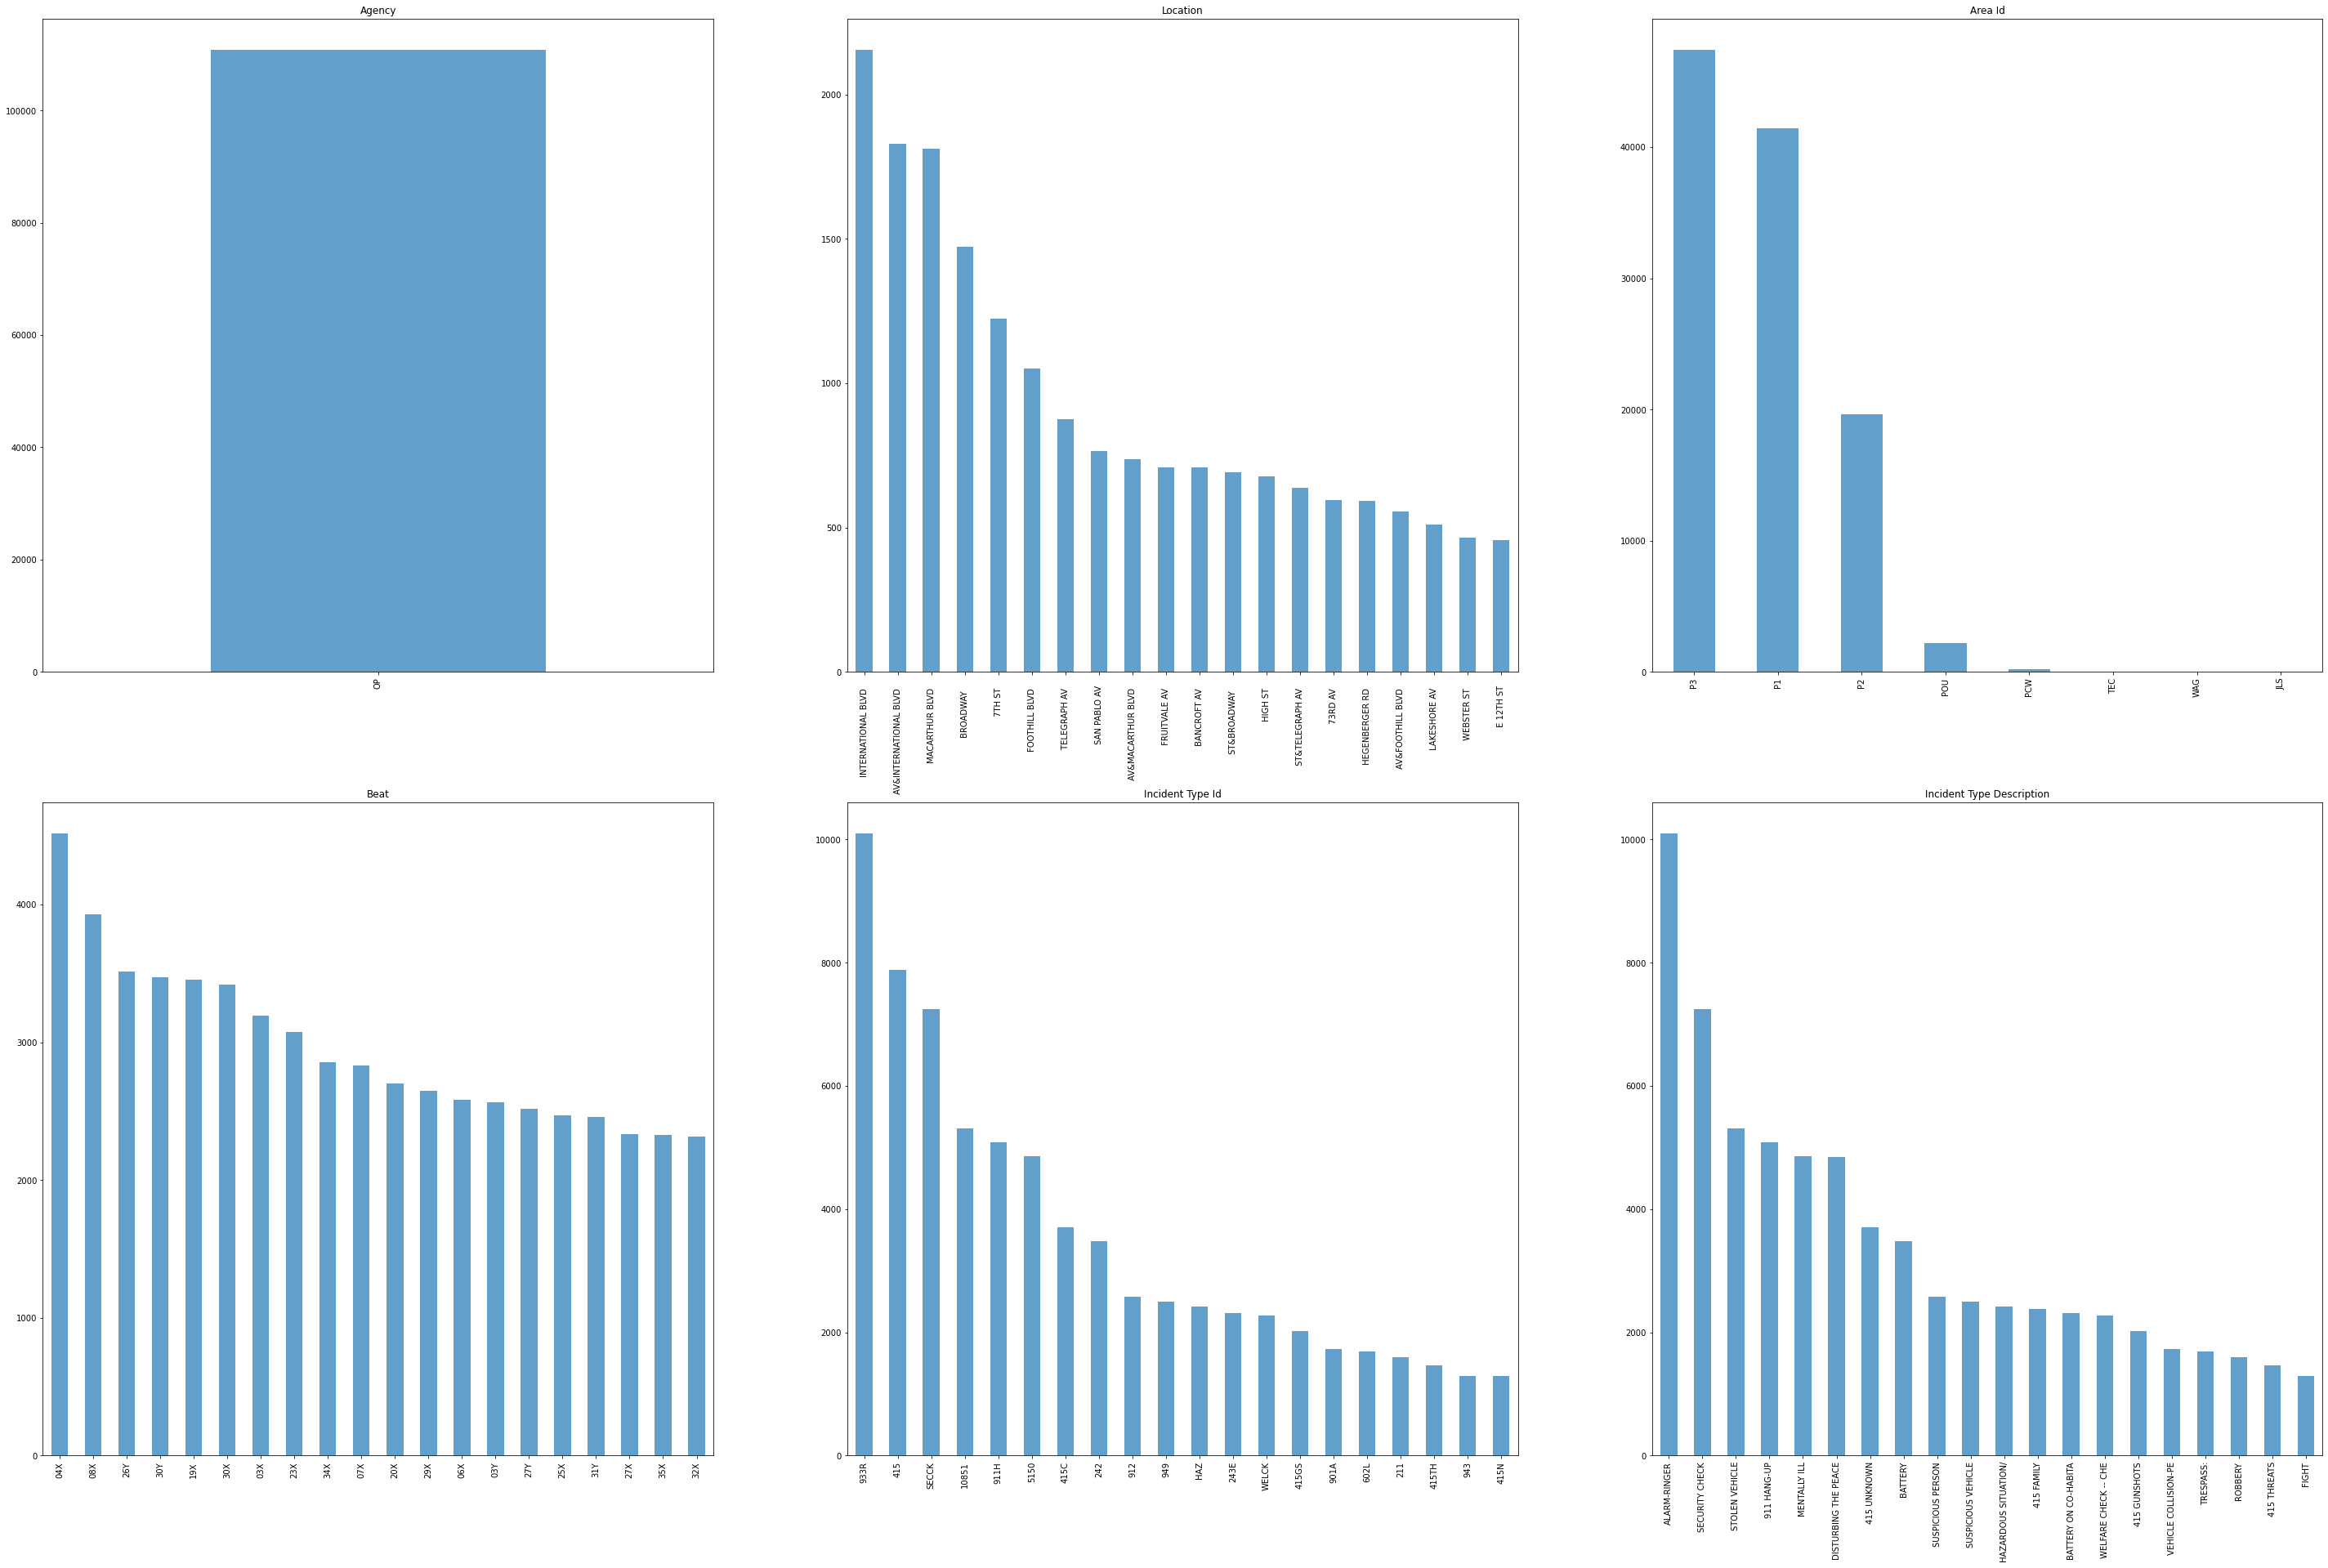

In [7]:
# records-for-2016.csv 中标称数据的条形图可视化
nominal_attributes_plt(df_130, nominal_attributes_130)

### 2.3 数值属性的分析：五数概括

In [8]:
# 数值属性的五数概括
print(df_130[numeric_attributes_130].describe())

            Priority
count  110827.000000
mean        1.778438
std         0.415299
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


### 2.4 数值属性的分析：五数概括的可视化（直方图、盒式图）


In [10]:
# 定义直方图函数
def numeric_attributes_hist(df, numeric_attributes, figsize=(10, 15)):
    for i, column in enumerate(numeric_attributes):
        if column == "price":
            bins, alpha = 200, 0.9
        else:
            bins, alpha = 20, 0.5
        plt.subplot(2, 1, i + 1)
        df[column].plot.hist(title=column, figsize=figsize, bins=bins, alpha=alpha)
    plt.show()

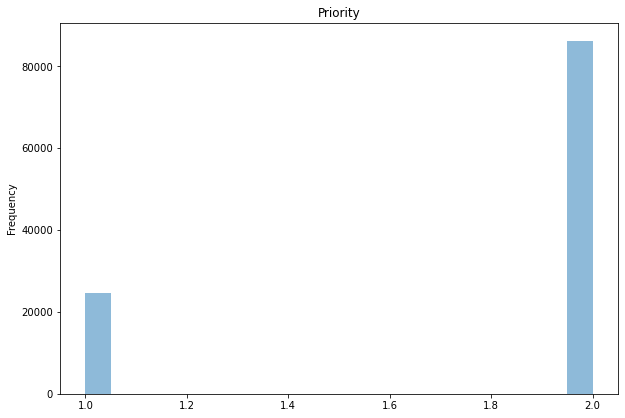

In [13]:
# records-for-2016.csv 数值数据直方图可视化
numeric_attributes_hist(df_130, numeric_attributes_130)

在records-for-2016.csv数据中：


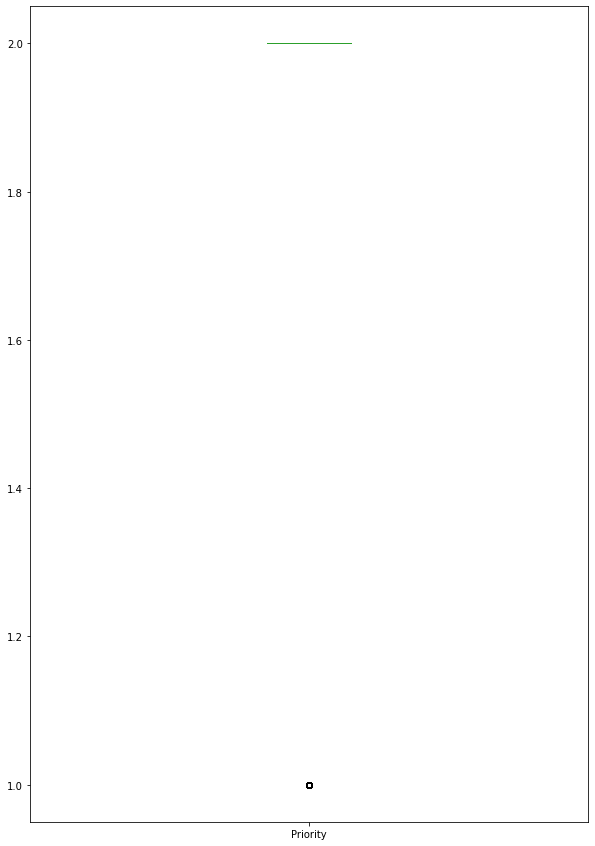

In [11]:
# 使用盒图进行分析
print("在records-for-2016.csv数据中：")
df_130[numeric_attributes_130].plot.box(figsize=(10, 15))
plt.show()

#### 1.查看数据缺失的数量

In [15]:
print("在records-for-2016.csv数据中：")
print(df_130.isnull().sum())

在records-for-2016.csv数据中：
Agency                         1
Create Time                    1
Location                       0
Area Id                        1
Beat                         581
Priority                       1
Incident Type Id               1
Incident Type Description      1
Event Number                   1
Closed Time                    1
dtype: int64


#### 2.使用 “将缺失部分剔除” 方法进行前后数据分析

In [13]:
# 定义新旧标称数据对比可视化函数
def nominal_attributes_bf_af(df_1, df_2, nominal_attributes, figsize=(60, 90), num=20):
    for i, column in enumerate(nominal_attributes):
        plt.subplot(7, 2, i * 2 + 1)
        df_1[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.5)
        plt.subplot(7, 2, i * 2 + 2)
        df_2[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.9)
    plt.show()


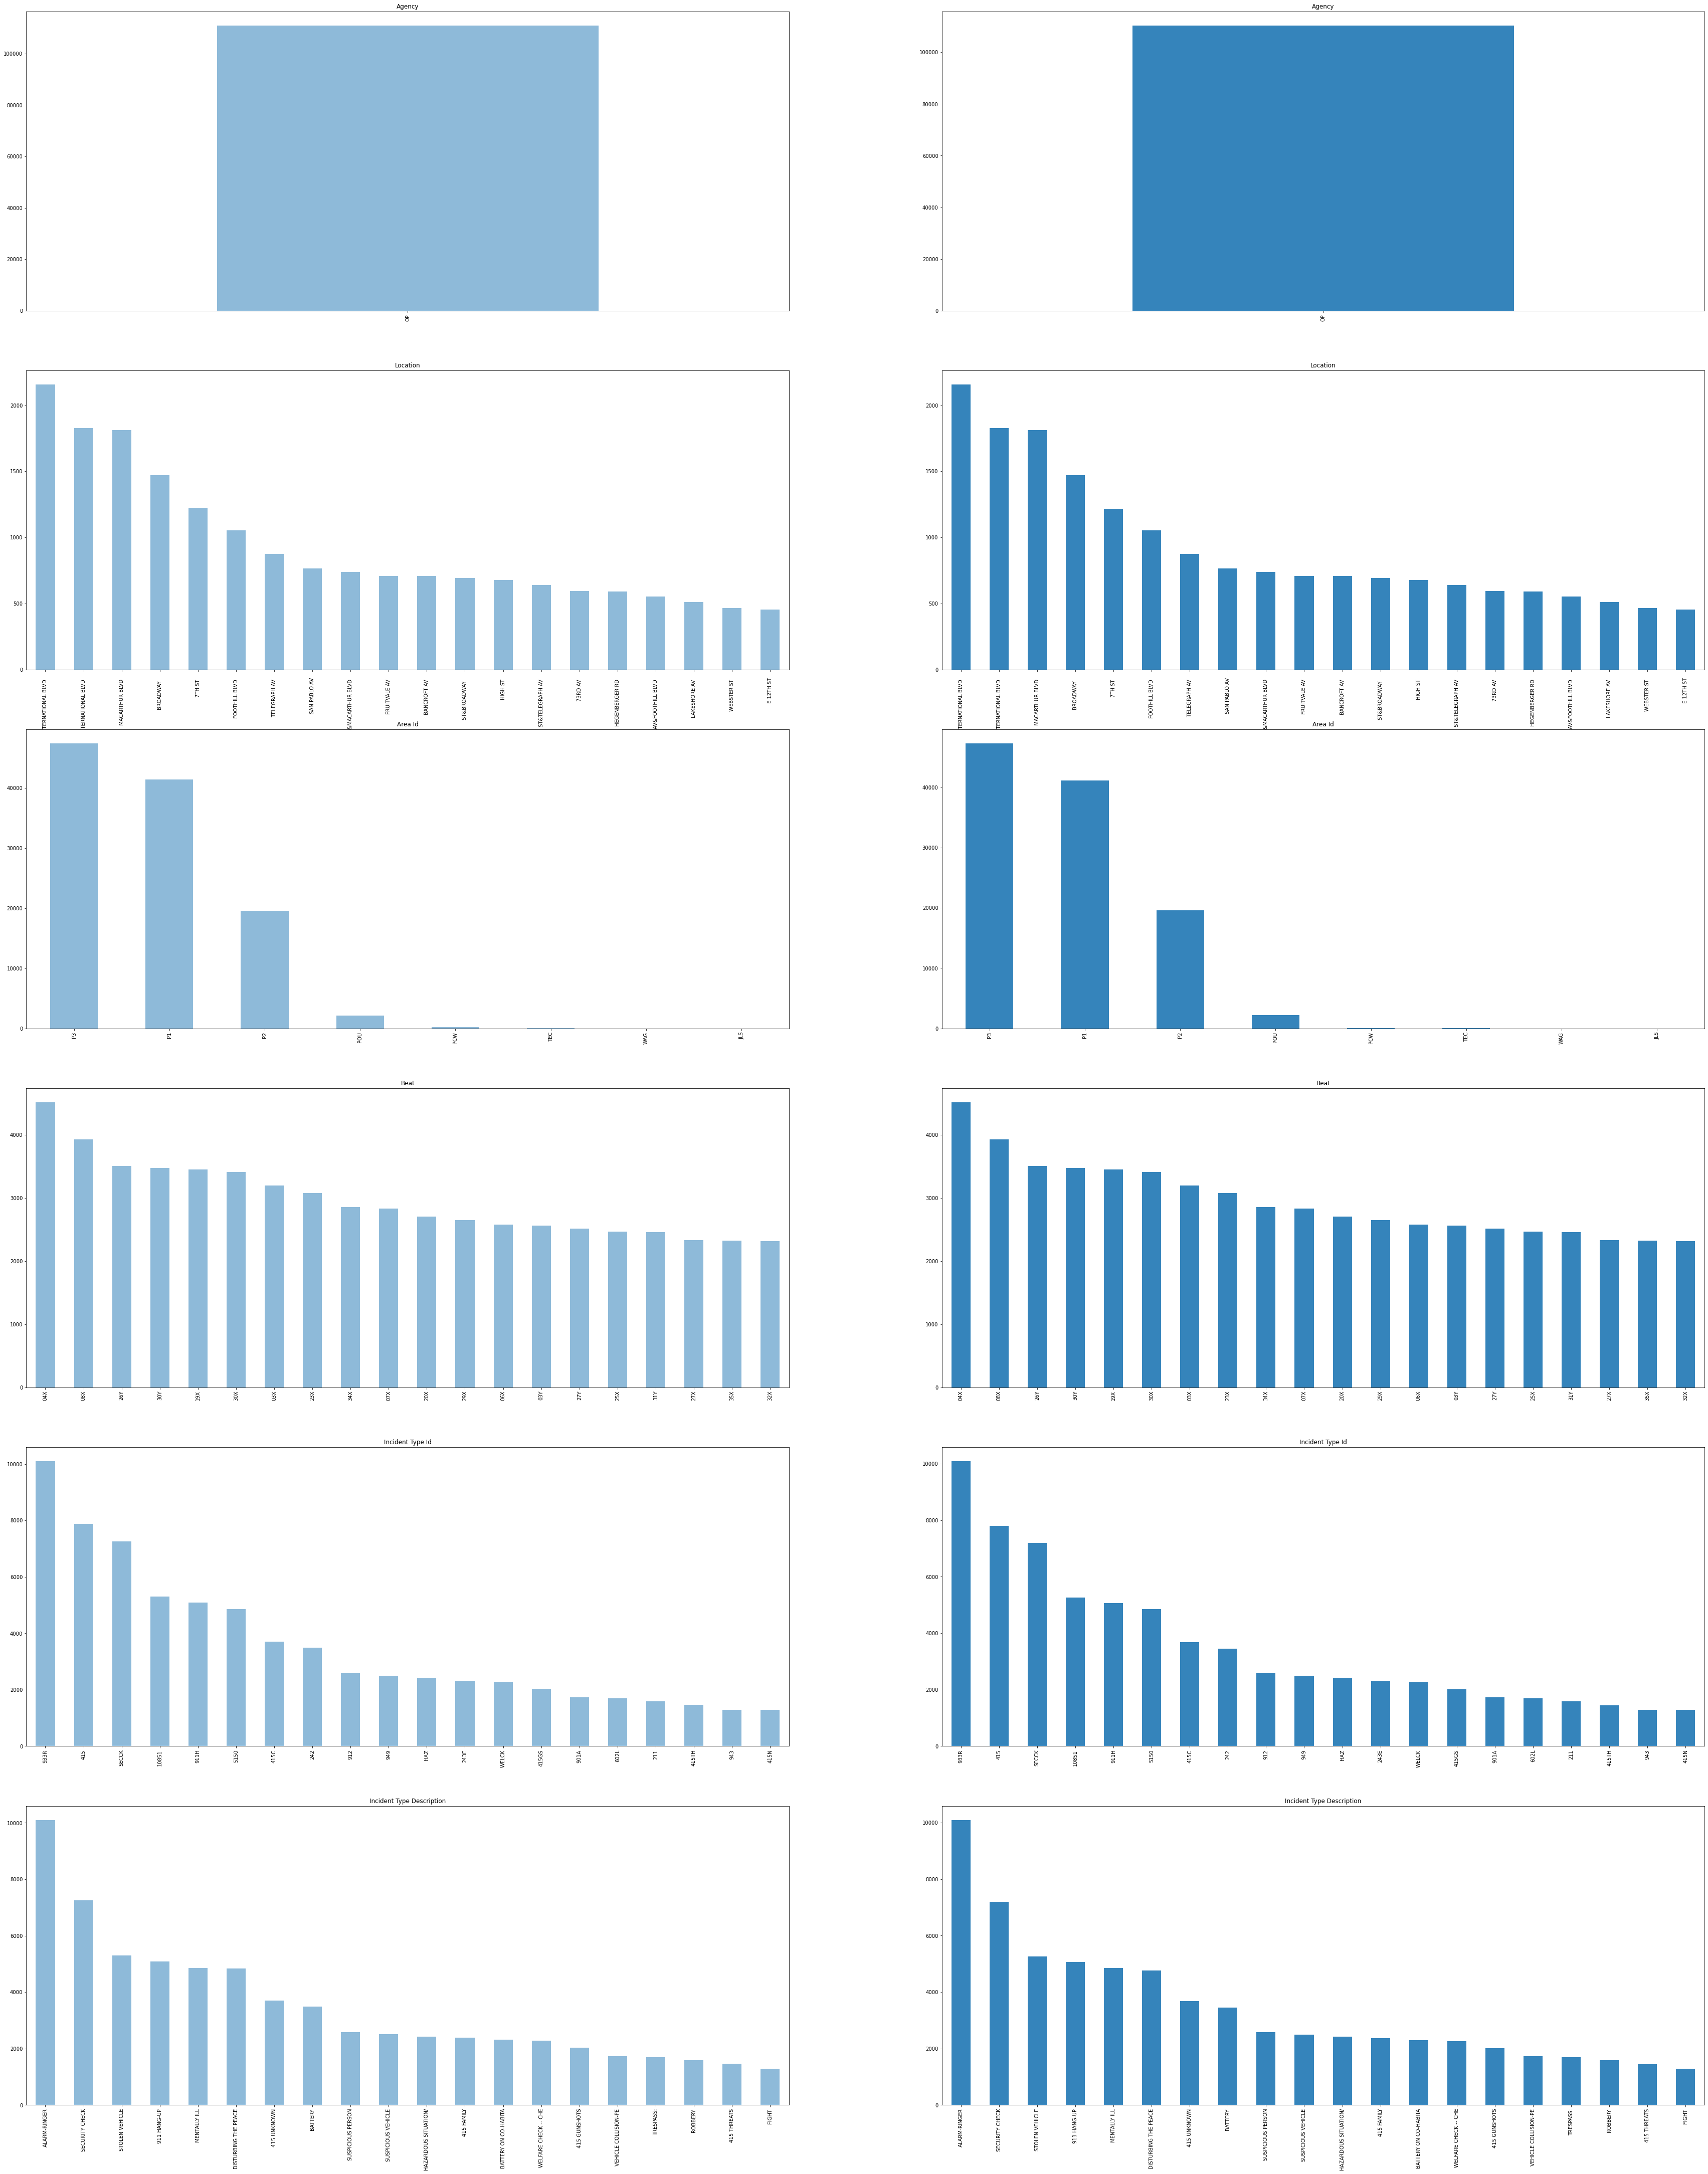

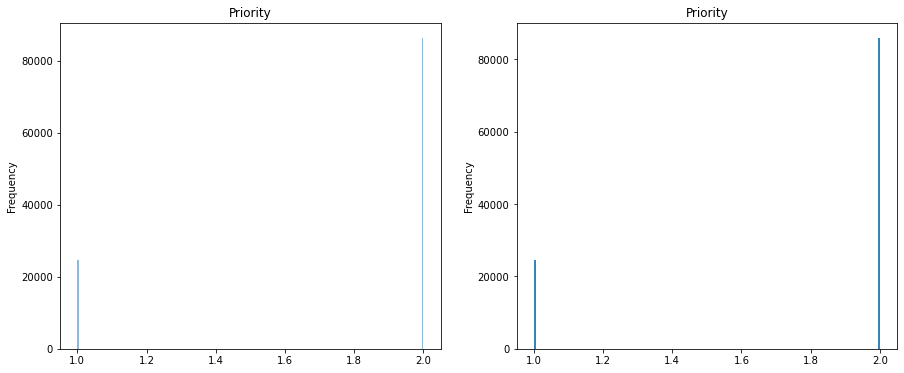

In [15]:
# 在records-for-2016.csv数据中
df_130_1 = df_130.dropna(how="any")
# 可视化对比新旧数据
nominal_attributes_bf_af(df_130, df_130_1, ['Agency', 'Location', 'Area Id', 'Beat', 'Incident Type Id', 'Incident Type Description'])
plt.subplot(1, 2, 1)
df_130["Priority"].plot.hist(title="Priority", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_1["Priority"].plot.hist(title="Priority", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()

In [16]:
# records-for-2016.csv 数据
print("在records-for-2016.csv数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_1.describe())

在winemag-data-130k-v2数据中
缺失值填充前：
             Priority
count  110827.000000
mean        1.778438
std         0.415299
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
缺失值填充后：
             Priority
count  110247.000000
mean        1.778107
std         0.415521
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


#### 3. 使用 “用最高频率值来填补缺失值” 方法进行前后数据分析 

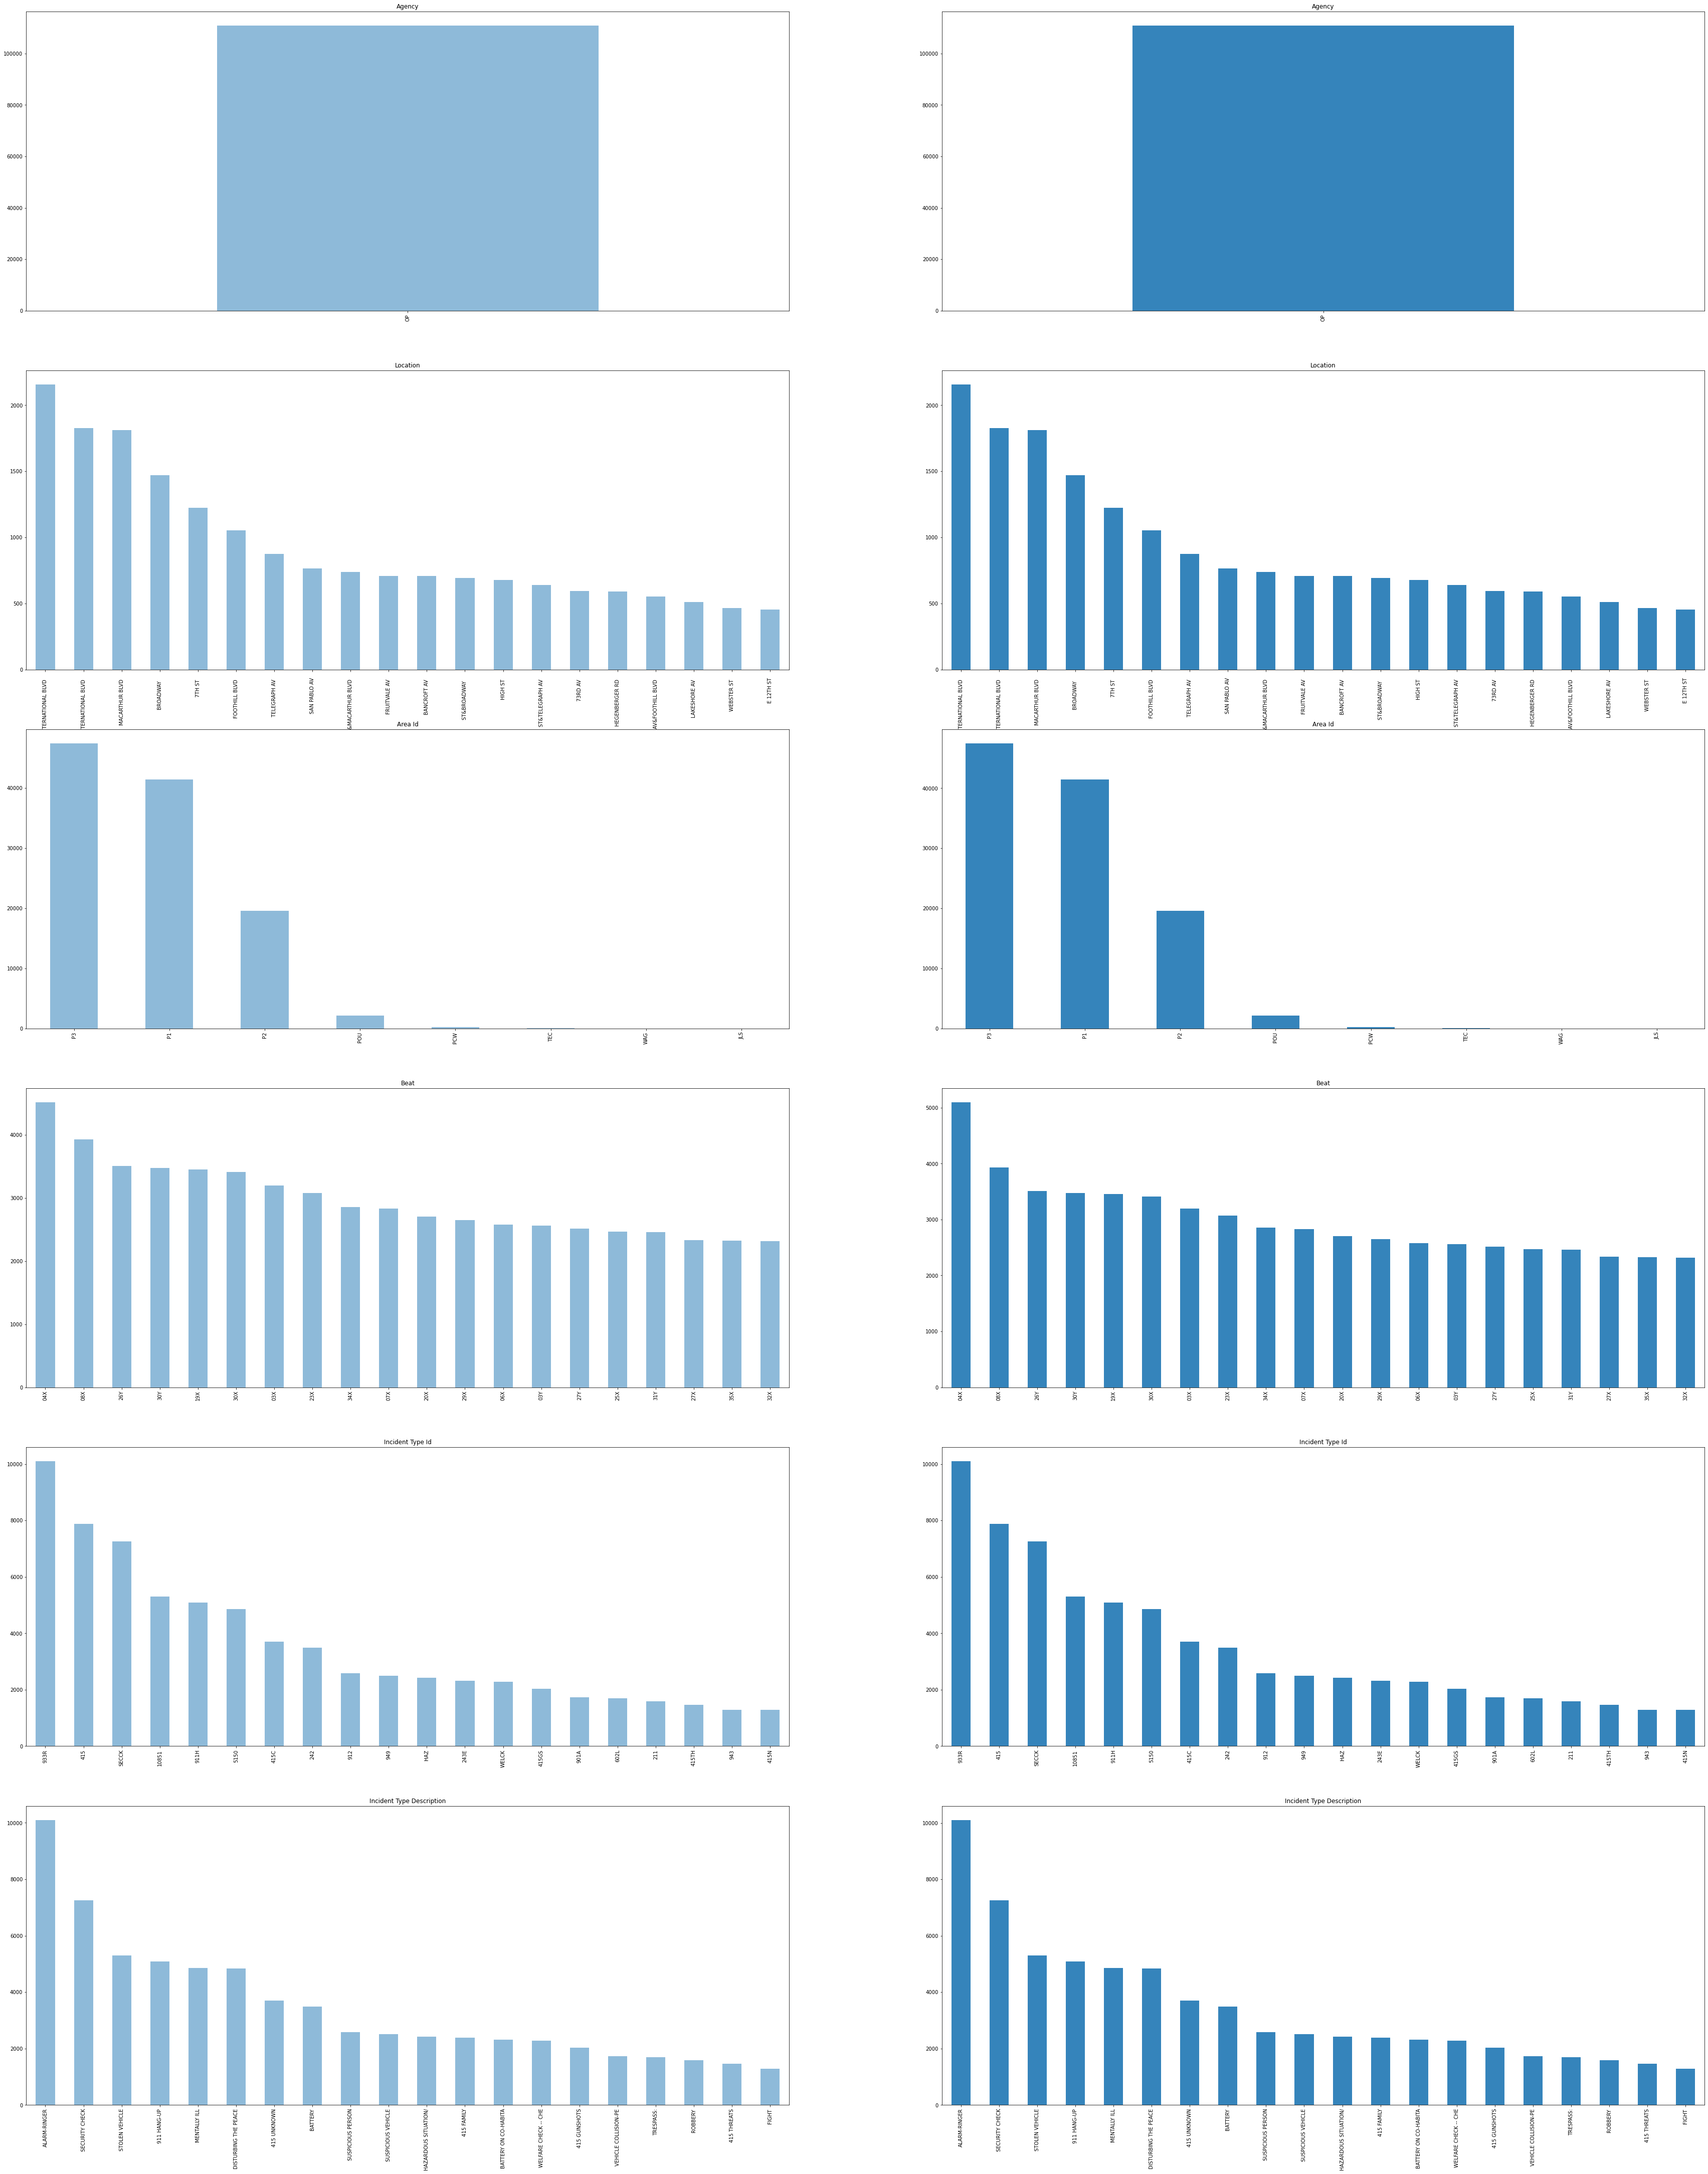

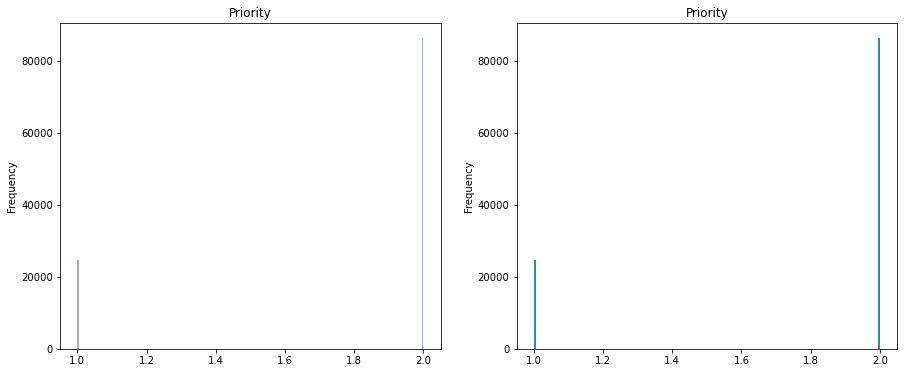

In [17]:
df_130_2 = df_130.fillna(df_130.mode().iloc[0])
# 可视化对比新旧数据
nominal_attributes_bf_af(df_130, df_130_2, ['Agency', 'Location', 'Area Id', 'Beat', 'Incident Type Id', 'Incident Type Description'])
plt.subplot(1, 2, 1)
df_130["Priority"].plot.hist(title="Priority", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_2["Priority"].plot.hist(title="Priority", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()

In [18]:
# records-for-2016.csv 数据
print("在records-for-2016.csv数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_2.describe())

在records-for-2016.csv数据中
缺失值填充前：
             Priority
count  110827.000000
mean        1.778438
std         0.415299
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
缺失值填充后：
             Priority
count  110828.000000
mean        1.778440
std         0.415298
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000


#### 4. 使用 “通过属性的相关关系来填补缺失值” 方法进行前后数据分析 

由于此数据集合只有 “Priority” 数值属性，无法通过此方式进行分析

#### 5. 使用 “通过数据对象之间的相似性来填补缺失值” 方法进行前后数据分析 

由于此数据集合只有 “Priority” 数值属性，无法通过此方式进行分析